In [1]:
import cv2
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [93]:
img_path = os.path.join('test','IMG_20220417_181829.jpg')
img = cv2.imread(img_path)
img = cv2.resize(img, (250, 250))
cv2.imwrite('test.jpg', img)

True

In [35]:
img_path = os.path.join('data', 'Nick_Korol', 'Nick_Korol_0002.jpg')
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [2]:
from mtcnn.mtcnn import MTCNN

detector = MTCNN()

In [37]:
results

[{'box': [69, 28, 149, 191],
  'confidence': 0.9999984502792358,
  'keypoints': {'left_eye': (116, 102),
   'right_eye': (183, 110),
   'nose': (150, 135),
   'mouth_left': (116, 171),
   'mouth_right': (173, 180)}}]

In [38]:
x, y, w, h = results[0]['box']

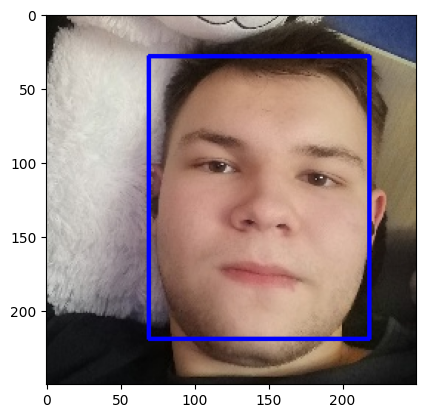

In [39]:
img = cv2.rectangle(img, (x,y), (x+w, y+h), (0,0,255), 2)
plt.imshow(img)

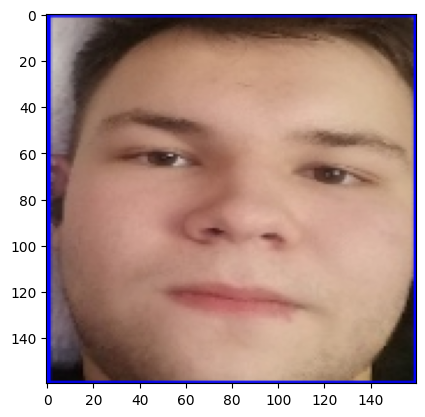

In [41]:
face = img[y:y+h, x:x+w,:]
face = cv2.resize(face, (160,160))
plt.imshow(face)

In [4]:
class FACELOADING:
    def __init__(self, directory):
        self.directory = os.path.join(directory)
        self.target_size = (160, 160)
        self.X = []
        self.y = []
        self.detector = MTCNN()
        
    def extract_face(self, filename):
        img = cv2.imread(filename)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        x,y,w,h = self.detector.detect_faces(img)[0]['box']
        x,y = abs(x), abs(y)
        face = img[y:y+h, x:x+w]
        face_arr = cv2.resize(face, self.target_size)
        return face_arr
    
    def load_faces(self, directory):
        FACES = []
        for im_name in os.listdir(directory):
            try:
                path = os.path.join(directory, im_name)
                single_face = self.extract_face(path)
                FACES.append(single_face)
            except Exception as e:
                pass
        return FACES
    
    def load_classes(self):
        for sub_dir in os.listdir(self.directory):
            path = os.path.join(self.directory, sub_dir)
            FACES = self.load_faces(path)
            labels = [sub_dir for _ in range(len(FACES))]
            print(f'Loaded successfully: {len(labels)}')
            self.X.extend(FACES)
            self.y.extend(labels)
        
        return np.asarray(self.X), np.asarray(self.y)
    
    def plot_images(self):
        plt.figure(figsize=(16, 12))
        for num, image in enumerate(self.X):
            ncols = 3
            nrows = len(self.y)//ncols + 1
            plt.subplot(nrows, ncols, num+1)
            plt.imshow(image)
            plt.axis('off')

In [5]:
faceloading = FACELOADING('data')
X, y = faceloading.load_classes()

1/1 [==============================] - 0s 157ms/step
Loaded successfully: 6
1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 25ms/step
Loaded successfully: 7
1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 34ms/step
Loaded successfully: 8
1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 27ms/step
Loaded successfully: 17
1/1 [==============================] - 0s 26ms/step
Loaded successfully: 8
1/1 [==============================] - 0s 52ms/step


1/1 [==============================] - 0s 38ms/step
Loaded successfully: 19
1/1 [==============================] - 0s 37ms/step


1/1 [==============================] - 0s 25ms/step
Loaded successfully: 17
1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 26ms/step
Loaded successfully: 7
1/1 [==============================] - 0s 34ms/step
Loaded successfully: 7
1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - 0s 339ms/step
Loaded successfully: 31
1/1 [==============================] - 0s 50ms/step


1/1 [==============================] - 0s 36ms/step
Loaded successfully: 11
1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 28ms/step
Loaded successfully: 17
1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 27ms/step
Loaded successfully: 7
1/1 [==============================] - 0s 26ms/step
Loaded successfully: 8
1/1 [==============================] - 0s 32ms/step
Loaded successfully: 7
1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 46ms/step


1/1 [==============================] - 0s 40ms/step
Loaded successfully: 19
1/1 [==============================] - 0s 43ms/step
Loaded successfully: 6
1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 51ms/step


1/1 [==============================] - 0s 44ms/step
Loaded successfully: 23
1/1 [==============================] - 0s 34ms/step
Loaded successfully: 9
1/1 [==============================] - 0s 44ms/step


1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 44ms/step
Loaded successfully: 28
1/1 [==============================] - 0s 46ms/step
Loaded successfully: 8
1/1 [==============================] - 0s 38ms/step


1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 51ms/step
Loaded successfully: 19
1/1 [==============================] - 0s 50ms/step


1/1 [==============================] - 0s 50ms/step
Loaded successfully: 15
1/1 [==============================] - 0s 43ms/step


1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 44ms/step
Loaded successfully: 60
1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - 0s 64ms/step
Loaded successfully: 7
1/1 [==============================] - 0s 38ms/step
Loaded successfully: 8
1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 39ms/step
Loaded successfully: 5
1/1 [==============================] - 0s 38ms/step
Loaded successfully: 6
1/1 [==============================] - 0s 65ms/step


1/1 [==============================] - 0s 26ms/step
Loaded successfully: 9
1/1 [==============================] - 0s 27ms/step
Loaded successfully: 12
1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 30ms/step
Loaded successfully: 8
1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 30ms/step
Loaded successfully: 14
1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 36ms/step
Loaded successfully: 11
1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 27ms/step
Loaded successfully: 18
1/1 [==============================] - 0s 110ms/step


1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 46ms/step
Loaded successfully: 41
1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 37ms/step
Loaded successfully: 9
1/1 [==============================] - 0s 41ms/step
Loaded successfully: 6
1/1 [==============================] - 0s 37ms/step


1/1 [==============================] - 0s 38ms/step
Loaded successfully: 7
1/1 [==============================] - 0s 39ms/step
Loaded successfully: 9
1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 36ms/step
Loaded successfully: 8
1/1 [==============================] - 0s 45ms/step


1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - 0s 42ms/step
Loaded successfully: 41
1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - 0s 35ms/step
Loaded successfully: 13
1/1 [==============================] - 0s 43ms/step


1/1 [==============================] - 0s 49ms/step
Loaded successfully: 5
1/1 [==============================] - 0s 135ms/step
Loaded successfully: 6
1/1 [==============================] - 0s 30ms/step
Loaded successfully: 6
1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 28ms/step
Loaded successfully: 14
1/1 [==============================] - 0s 38ms/step


1/1 [==============================] - 0s 27ms/step
Loaded successfully: 12
1/1 [==============================] - 0s 49ms/step


1/1 [==============================] - 0s 34ms/step
Loaded successfully: 18
1/1 [==============================] - 0s 61ms/step


1/1 [==============================] - 0s 55ms/step
Loaded successfully: 8
1/1 [==============================] - 0s 63ms/step
Loaded successfully: 5
1/1 [==============================] - 0s 31ms/step
Loaded successfully: 7
1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 35ms/step
Loaded successfully: 11
1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 32ms/step
Loaded successfully: 8
1/1 [==============================] - 0s 29ms/step
Loaded successfully: 10
1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 28ms/step
Loaded successfully: 15
1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 30ms/step
Loaded successfully: 6
1/1 [==============================] - 0s 28ms/step
Loaded successfully: 10
1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 169ms/step
Loaded successfully: 8
1/1 [==============================] - 0s 61ms/step


1/1 [==============================] - 0s 34ms/step
Loaded successfully: 15
1/1 [==============================] - 0s 50ms/step


1/1 [==============================] - 0s 44ms/step
Loaded successfully: 22
1/1 [==============================] - 0s 60ms/step
Loaded successfully: 6
1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - 0s 50ms/step


1/1 [==============================] - 0s 61ms/step


1/1 [==============================] - 0s 66ms/step
Loaded successfully: 37
1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - 0s 43ms/step
Loaded successfully: 11
1/1 [==============================] - 0s 44ms/step
Loaded successfully: 9
1/1 [==============================] - 0s 46ms/step
Loaded successfully: 5
1/1 [==============================] - 0s 49ms/step


1/1 [==============================] - 0s 46ms/step


1/1 [==============================] - 0s 57ms/step
Loaded successfully: 19
1/1 [==============================] - 0s 81ms/step


1/1 [==============================] - 0s 50ms/step
Loaded successfully: 15
1/1 [==============================] - 0s 43ms/step
Loaded successfully: 7
1/1 [==============================] - 0s 47ms/step
Loaded successfully: 7


1/1 [==============================] - 0s 41ms/step
Loaded successfully: 10
1/1 [==============================] - 0s 53ms/step


1/1 [==============================] - 0s 54ms/step
Loaded successfully: 6
1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 48ms/step
Loaded successfully: 20
1/1 [==============================] - 0s 54ms/step
Loaded successfully: 11


1/1 [==============================] - 0s 48ms/step
Loaded successfully: 8
1/1 [==============================] - 0s 51ms/step
Loaded successfully: 7
1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 49ms/step
Loaded successfully: 9
1/1 [==============================] - 0s 37ms/step


1/1 [==============================] - 0s 50ms/step
Loaded successfully: 10
1/1 [==============================] - 0s 46ms/step
Loaded successfully: 7
1/1 [==============================] - 0s 60ms/step


1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - 0s 85ms/step
Loaded successfully: 27
1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 33ms/step
Loaded successfully: 16
1/1 [==============================] - 0s 37ms/step
Loaded successfully: 6
1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 58ms/step
Loaded successfully: 10
1/1 [==============================] - 0s 48ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 42ms/step
Loaded successfully: 33
1/1 [==============================] - 0s 48ms/step
Loaded successfully: 5
1/1 [==============================] - 0s 66ms/step


1/1 [==============================] - 0s 43ms/step
Loaded successfully: 17
1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 59ms/step
Loaded successfully: 32
1/1 [==============================] - 0s 44ms/step


1/1 [==============================] - 0s 47ms/step
Loaded successfully: 7
1/1 [==============================] - 0s 61ms/step


1/1 [==============================] - 0s 48ms/step


2/2 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 53ms/step
Loaded successfully: 49
1/1 [==============================] - 0s 47ms/step
Loaded successfully: 7
1/1 [==============================] - 0s 45ms/step


1/1 [==============================] - 0s 61ms/step
Loaded successfully: 10
1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - 0s 44ms/step
Loaded successfully: 13
1/1 [==============================] - 0s 49ms/step
Loaded successfully: 7
1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - 0s 45ms/step
Loaded successfully: 7
1/1 [==============================] - 0s 50ms/step


1/1 [==============================] - 0s 44ms/step
Loaded successfully: 24
1/1 [==============================] - 0s 49ms/step


1/1 [==============================] - 0s 45ms/step
Loaded successfully: 5
1/1 [==============================] - 0s 64ms/step
Loaded successfully: 8
1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - 0s 44ms/step
Loaded successfully: 7
1/1 [==============================] - 0s 79ms/step
Loaded successfully: 8
1/1 [==============================] - 0s 46ms/step


1/1 [==============================] - 0s 51ms/step
Loaded successfully: 6
1/1 [==============================] - 0s 55ms/step
Loaded successfully: 14
1/1 [==============================] - 0s 63ms/step


1/1 [==============================] - 0s 50ms/step
Loaded successfully: 9
1/1 [==============================] - 0s 54ms/step
Loaded successfully: 6


In [6]:
from keras_facenet import FaceNet

In [7]:
embedder = FaceNet()

def get_embedding(face_img):
    face_img = face_img.astype('float32')
    face_img = np.expand_dims(face_img, axis=0)
    
    yhat = embedder.embeddings(face_img)
    return yhat[0]

In [8]:
EMBEDDED_X = []

for img in X:
    EMBEDDED_X.append(get_embedding(img))

EMBEDDED_X = np.asarray(EMBEDDED_X)

1/1 [==============================] - 0s 128ms/step


1/1 [==============================] - 0s 120ms/step


1/1 [==============================] - 0s 135ms/step


1/1 [==============================] - 0s 114ms/step


1/1 [==============================] - 0s 150ms/step


1/1 [==============================] - 0s 94ms/step


1/1 [==============================] - 0s 101ms/step


1/1 [==============================] - 0s 112ms/step


1/1 [==============================] - 0s 77ms/step


In [9]:
np.savez_compressed('faces_v3.npz', EMBEDDED_X, y)

In [10]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)

In [11]:
npz_file = np.load('faces_v3.npz')
EMBEDDED_X, y = npz_file['arr_0'], npz_file['arr_1']

In [12]:
y

array(['Andrey_Korol', 'Andrey_Korol', 'Andrey_Korol', ...,
       'Zinedine_Zidane', 'Zinedine_Zidane', 'Zinedine_Zidane'],
      dtype='<U28')

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(EMBEDDED_X, y, shuffle=True, random_state=17)

In [14]:
from sklearn.svm import SVC
model = SVC(kernel='linear', probability=True)
model.fit(X_train, Y_train)

SVC(kernel='linear', probability=True)

In [15]:
ypreds_train = model.predict(X_train)
ypreds_test = model.predict(X_test)

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy_score(Y_train, ypreds_train)

0.9969666329625885

In [17]:
accuracy_score(Y_test, ypreds_test)

0.9666666666666667

In [18]:
precision_score(Y_train, ypreds_train, average='macro')

0.9983319716775599

In [19]:
precision_score(Y_test, ypreds_test, average='macro')

D:\Anaconda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


0.9487455197132618

In [20]:
recall_score(Y_train, ypreds_train, average='macro')

0.9955882352941177

In [21]:
recall_score(Y_test, ypreds_test, average='macro')

D:\Anaconda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


0.9488223246287764

In [22]:
f1_score(Y_train, ypreds_train, average='macro')

0.9967311650176099

In [23]:
f1_score(Y_test, ypreds_test, average='macro')

0.945567997531532

In [23]:
t_im = cv2.imread(os.path.join('test_2.jpg'))
t_im = cv2.cvtColor(t_im, cv2.COLOR_BGR2RGB)
x,y,w,h = detector.detect_faces(t_im)[0]['box']

1/1 [==============================] - 0s 244ms/step


In [24]:
t_im = t_im[y:y+h, x:x+w]
t_im = cv2.resize(t_im, (160,160))

In [25]:
t_im

array([[[ 87,  69,  69],
        [ 89,  69,  69],
        [ 90,  70,  70],
        ...,
        [ 45,  39,  38],
        [ 45,  39,  39],
        [ 46,  41,  38]],

       [[ 86,  72,  67],
        [ 87,  71,  67],
        [ 88,  71,  67],
        ...,
        [ 47,  39,  35],
        [ 45,  39,  34],
        [ 45,  40,  35]],

       [[ 87,  74,  66],
        [ 88,  74,  65],
        [ 87,  73,  64],
        ...,
        [ 44,  38,  32],
        [ 41,  38,  31],
        [ 40,  37,  30]],

       ...,

       [[120, 117, 112],
        [140, 135, 135],
        [155, 154, 155],
        ...,
        [ 40,  49,  43],
        [ 40,  49,  46],
        [ 41,  47,  47]],

       [[127, 120, 116],
        [133, 126, 125],
        [158, 154, 155],
        ...,
        [ 40,  48,  41],
        [ 42,  48,  44],
        [ 43,  46,  47]],

       [[126, 115, 113],
        [125, 113, 113],
        [150, 141, 142],
        ...,
        [ 44,  47,  41],
        [ 45,  48,  46],
        [ 46,  47,  49]]

In [26]:
test_im = get_embedding(t_im)

1/1 [==============================] - 0s 78ms/step


In [27]:
test_im = [test_im]
ypreds = model.predict(test_im)

In [28]:
ypreds

array(['Nick_Korol'], dtype='<U28')

In [24]:
filename = 'finalmodel.sav'
pickle.dump(model, open(filename, 'wb'))

In [10]:
loaded_model = pickle.load(open('finalmodel.sav', 'rb'))
result = loaded_model.predict([test_im])

In [12]:
result

array([2])